<a href="https://colab.research.google.com/github/agmarrugo/computer-vision-utb/blob/main/notebooks/04_thresholding_images_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Histograms and binary images

Andres Marrugo, PhD    
Universidad Tecnológica de Bolívar


In [7]:
# import cv2 as cv
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 


Grayscale image


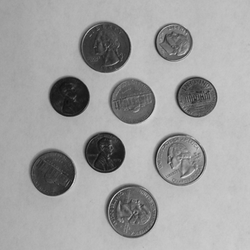

In [12]:
IMAGE_URL = 'https://github.com/agmarrugo/computer-vision-utb/blob/main/data/coins.png?raw=true'

# urllib.request.urlretrieve(IMAGE_URL, 'coins.png')

image = io.imread(IMAGE_URL) 
# image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)
# cv2.imshow("Image", image)

# plt.imshow(image)
print("Grayscale image")
cv2_imshow(image)

### Thresholding

Thresholding is the binarization of an image. In general,
we seek to convert a grayscale image to a binary image,
where the pixels are either 0 or 255.
A simple thresholding example would be selecting a pixel
value p, and then setting all pixel intensities less than p to
zero, and all pixel values greater than p to 255. In this way,
we are able to create a binary representation of the image.

Threshold Binary


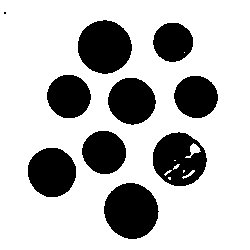

In [20]:
# Here we select T=155 as the threshold
(T, threshImg) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY)
print("Threshold Binary")
cv2_imshow(threshImg)

In this first example, any pixel value that is greater than 155 is set to 255. Any value that is less than 155 is set to zero.

We used the `cv2.THRESH_BINARY` method, which indicates that pixel values p greater than T are set to the maximum value (the third argument).

Threshold Binary Inverse


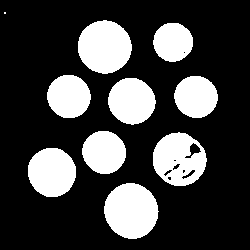

In [21]:
# Inverse thresholding
(T, threshInv) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY_INV)

print("Threshold Binary Inverse")
cv2_imshow(threshInv)


We applied inverse thresholding rather than
normal thresholding by using `cv2.THRESH_BINARY_INV` as
our thresholding method. As we can see in the image above, our coins are now white and the background is black. This is convenient for producing a mask.

In [ ]:
# Inverse thresholding image as a mask
print("Coins")
cv2_imshow(cv2.bitwise_and(image, image, mask=threshInv))

We performed masking by using the `cv2.bitwise_and` function. We supplied our original coin image as the first
two arguments, and then our inverted thresholded image as
our mask. Remember, a mask only considers pixels in the
original image where the mask is greater than zero. 

Since our inverted thresholded image does a good job
at approximating the areas the coins are contained in, we
can use this inverted thresholded image as our mask.

In [ ]:
# TODO repeat the above operations with an image of your choosing
# that is ease to segment.